In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [64]:
data1_path = "./round_6/[ROI]CF6.0_B01_N01.npy"
data2_path = "./round_6/[ROI]CF6.1F_B32_N04.npy"

In [65]:
def normalize_mean_method(video_array):
    mean = np.mean(video_array[:30, :, :], axis=0, keepdims=True)
    nomarlized = np.maximum(video_array - mean, 0)
    return nomarlized

# convert a np array to an avi video
# input shape: (frames, height, width)
def convert_to_avi(input_path, outputname):
    video_array = np.load(input_path)

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(f'./files/{outputname}', fourcc, 30.0, (video_array.shape[2], video_array.shape[1]))

    video_array = normalize_mean_method(video_array)
    global_min, global_max = 0.0, 1132.3999999999996
    video_array = ((video_array - global_min) / (global_max - global_min) * 255).astype(np.uint8)
    rgbs = np.stack([cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB) for frame in video_array], axis=0)

    for i, frame in enumerate(rgbs):
        out.write(frame)

    out.release()
    return rgbs

In [66]:
convert_to_avi(data1_path, "alive.mp4")
convert_to_avi(data2_path, "dead.mp4")

array([[[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        ...,

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]],

        [[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [ 0,  0,  0]]],


       [[[ 0,  0,  0],
         [ 0,  0,  0],
         [ 0, 

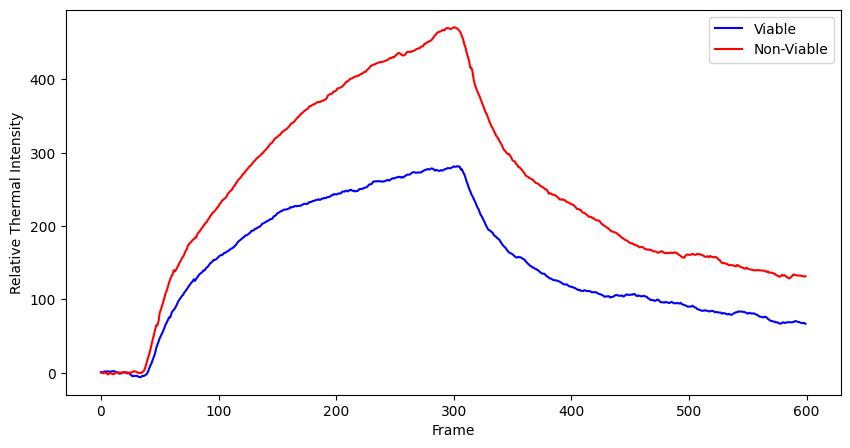

In [67]:
def plot_mean_curve(data1_path, data2_path):
    data1 = np.load(data1_path)
    data2 = np.load(data2_path)

    mean1 = data1.mean(axis=(1,2))
    mean2 = data2.mean(axis=(1,2))

    # normalize the curve to make first30 frames down to 0
    mean1 = mean1 - mean1[:30].mean()
    mean2 = mean2 - mean2[:30].mean()

    # plot the curves in one figure with labels
    plt.figure(figsize=(10, 5))
    plt.plot(mean1, label='Viable', color='blue')
    plt.plot(mean2, label='Non-Viable', color='red')
    plt.xlabel('Frame')
    plt.ylabel('Relative Thermal Intensity')
    plt.legend()
    plt.show()
plot_mean_curve("../size-21/round_6/[ROI]CF6.0_B01_N01.npy", "../size-21/round_6/[ROI]CF6.1F_B32_N04.npy")